# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 635


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"
base_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | pedernales
Processing Record 2 of Set 1 | khatanga
Processing Record 3 of Set 1 | mataura
Processing Record 4 of Set 1 | cape town
Processing Record 5 of Set 1 | hirara
Processing Record 6 of Set 1 | ostrovnoy
Processing Record 7 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 8 of Set 1 | hobart
Processing Record 9 of Set 1 | saint-philippe
Processing Record 10 of Set 1 | mtimbira
Processing Record 11 of Set 1 | kisarawe
Processing Record 12 of Set 1 | rocha
Processing Record 13 of Set 1 | severo-yeniseyskiy
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | nome
Processing Record 16 of Set 1 | atuona
Processing Record 17 of Set 1 | tiksi
Processing Record 18 of Set 1 | yellowknife
Processing Record 19 of Set 1 | lebu
Processing Record 20 of Set 1 | mirador
Processing Record 21 of Set 1 | dikson
Processing Record 22 of Set 1 | albany
Processing Reco

Processing Record 37 of Set 4 | hithadhoo
Processing Record 38 of Set 4 | bengkulu
Processing Record 39 of Set 4 | ossora
Processing Record 40 of Set 4 | iisalmi
Processing Record 41 of Set 4 | hami
Processing Record 42 of Set 4 | phan rang
City not found. Skipping...
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | shaowu
Processing Record 45 of Set 4 | karasburg
Processing Record 46 of Set 4 | koudougou
Processing Record 47 of Set 4 | kogon
Processing Record 48 of Set 4 | suoyarvi
Processing Record 49 of Set 4 | furukawa
Processing Record 0 of Set 5 | samusu
City not found. Skipping...
Processing Record 1 of Set 5 | maracaju
Processing Record 2 of Set 5 | palmer
Processing Record 3 of Set 5 | pangody
Processing Record 4 of Set 5 | fortuna
Processing Record 5 of Set 5 | malanje
Processing Record 6 of Set 5 | grand river south east
City not found. Skipping...
Processing Record 7 of Set 5 | tefe
Processing Record 8 of Set 5 | kazbegi
City not found. Skipping.

Processing Record 28 of Set 8 | altus
Processing Record 29 of Set 8 | yumen
Processing Record 30 of Set 8 | sola
Processing Record 31 of Set 8 | saint george
Processing Record 32 of Set 8 | muros
Processing Record 33 of Set 8 | sorvag
City not found. Skipping...
Processing Record 34 of Set 8 | sistranda
Processing Record 35 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 36 of Set 8 | berdigestyakh
Processing Record 37 of Set 8 | dargaville
Processing Record 38 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 39 of Set 8 | maunabo
Processing Record 40 of Set 8 | mountain home
Processing Record 41 of Set 8 | kristiansund
Processing Record 42 of Set 8 | lamballe
Processing Record 43 of Set 8 | segezha
Processing Record 44 of Set 8 | nantucket
Processing Record 45 of Set 8 | ucluelet
Processing Record 46 of Set 8 | berlevag
Processing Record 47 of Set 8 | lugovoy
Processing Record 48 of Set 8 | mafinga
Processing Record 49 of Set 8 | bretcu
Processing Reco

Processing Record 13 of Set 12 | iqaluit
Processing Record 14 of Set 12 | dalhousie
Processing Record 15 of Set 12 | sungurlu
Processing Record 16 of Set 12 | mungwi
Processing Record 17 of Set 12 | xining
Processing Record 18 of Set 12 | chornobay
Processing Record 19 of Set 12 | lyantonde
Processing Record 20 of Set 12 | saskatoon
Processing Record 21 of Set 12 | mrirt
City not found. Skipping...
Processing Record 22 of Set 12 | moroni
Processing Record 23 of Set 12 | villamontes
Processing Record 24 of Set 12 | port shepstone
Processing Record 25 of Set 12 | kismayo
Processing Record 26 of Set 12 | saint-paul-les-dax
Processing Record 27 of Set 12 | todos santos
Processing Record 28 of Set 12 | karamay
City not found. Skipping...
Processing Record 29 of Set 12 | gobabis
Processing Record 30 of Set 12 | virginia beach
Processing Record 31 of Set 12 | manavalakurichi
Processing Record 32 of Set 12 | el mahalla el kubra
City not found. Skipping...
Processing Record 33 of Set 12 | binzh

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,pedernales,18.0384,-71.7440,24.81,73,20,1.90,DO,1678151606
1,khatanga,71.9667,102.5000,-33.15,100,99,1.23,RU,1678151297
2,mataura,-46.1927,168.8643,21.38,32,16,1.80,NZ,1678151214
3,cape town,-33.9258,18.4232,19.10,70,0,7.15,ZA,1678151202
4,hirara,24.8000,125.2833,21.15,43,20,4.63,JP,1678151607


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pedernales,18.0384,-71.7440,24.81,73,20,1.90,DO,1678151606
1,khatanga,71.9667,102.5000,-33.15,100,99,1.23,RU,1678151297
2,mataura,-46.1927,168.8643,21.38,32,16,1.80,NZ,1678151214
3,cape town,-33.9258,18.4232,19.10,70,0,7.15,ZA,1678151202
4,hirara,24.8000,125.2833,21.15,43,20,4.63,JP,1678151607


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

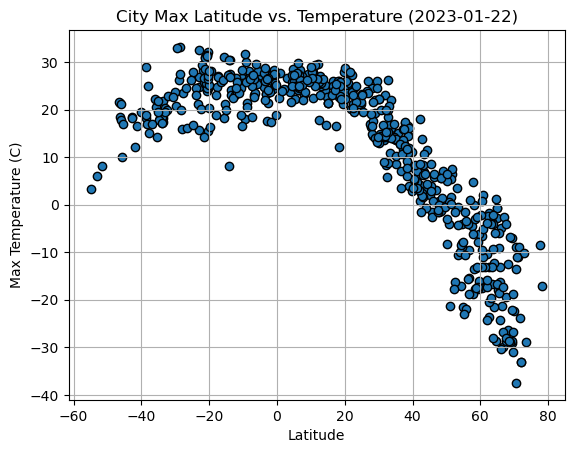

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2023-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

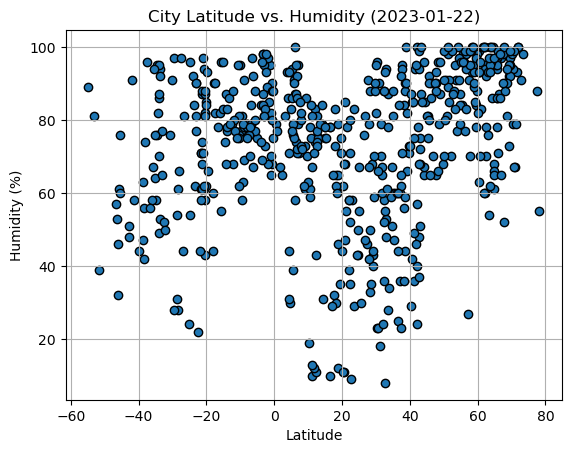

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2023-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

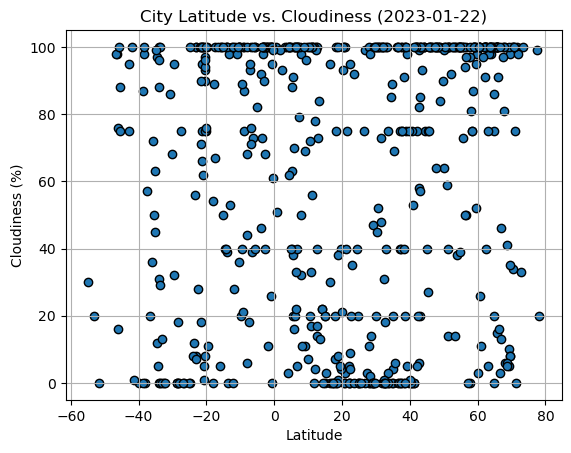

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2023-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

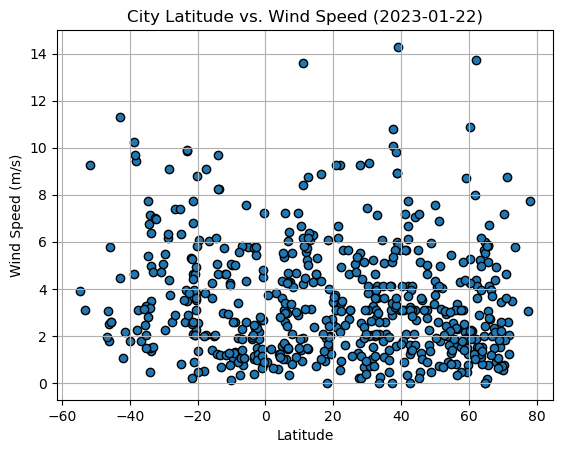

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2023-01-22)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [20]:
# Define a function to create Linear Regression plots
def linear_regression_plots(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept, 2))
    
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regression_values, "r-")
    
    
    print(f"The r-value is : {rvalue ** 2}")
    return line_eq

In [21]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,pedernales,18.0384,-71.7440,24.81,73,20,1.90,DO,1678151606
1,khatanga,71.9667,102.5000,-33.15,100,99,1.23,RU,1678151297
4,hirara,24.8000,125.2833,21.15,43,20,4.63,JP,1678151607
5,ostrovnoy,68.0531,39.5131,-12.47,90,100,4.91,RU,1678151608
11,severo-yeniseyskiy,60.3725,93.0408,-6.60,93,100,5.28,RU,1678151612


In [22]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mataura,-46.1927,168.8643,21.38,32,16,1.80,NZ,1678151214
3,cape town,-33.9258,18.4232,19.10,70,0,7.15,ZA,1678151202
6,hobart,-42.8794,147.3294,18.48,48,75,11.32,AU,1678151609
7,saint-philippe,-21.3585,55.7679,24.77,87,95,4.65,RE,1678151232
8,mtimbira,-8.7833,36.3500,21.43,91,87,1.02,TZ,1678151610


###  Temperature vs. Latitude Linear Regression Plot

The r-value is : 0.8415737431441356


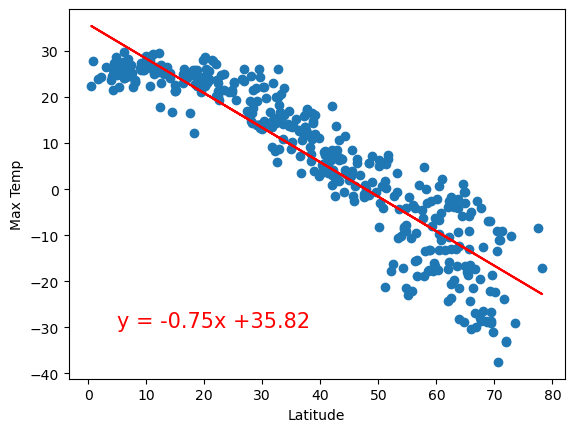

In [23]:
# Linear regression on Northern Hemisphere
regress_temp_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
regress_temp_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(regress_temp_northern_hemi, (5, -30), fontsize=15, color="red")
plt.show()

The r-value is : 0.2714700852144728


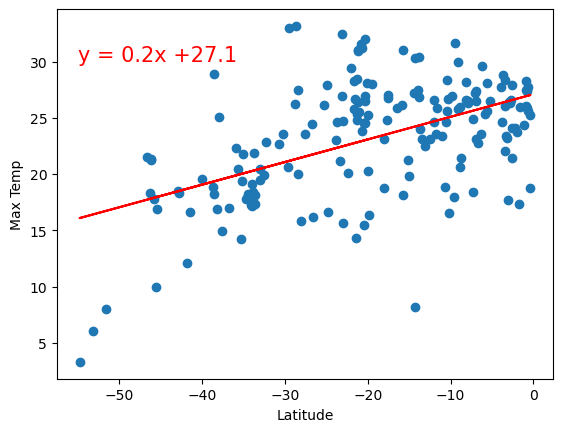

In [24]:
# Linear regression on Southern Hemisphere
regress_temp_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
regress_temp_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.annotate(regress_temp_southern_hemi, (-55, 30), fontsize=15, color="red")
plt.show()

Discussion about the linear relationship: 

Northern Hemisphere: the cities' latitudes and max temperatures are highly, negatively correlated for the northern hemisphere.

Southern Hemisphere: the cities's latitudes and max temperatures are slightly, positively correlated for the southern hemisphere.

### Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.15670254748794601


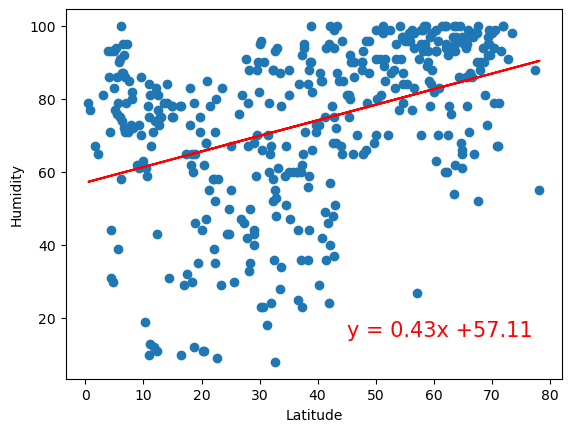

In [26]:
# Northern Hemisphere
regression_humidity_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
regression_humidity_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(regression_humidity_northern_hemi, (45, 15), fontsize=15, color="red")
plt.show()

The r-value is : 0.15429973526269442


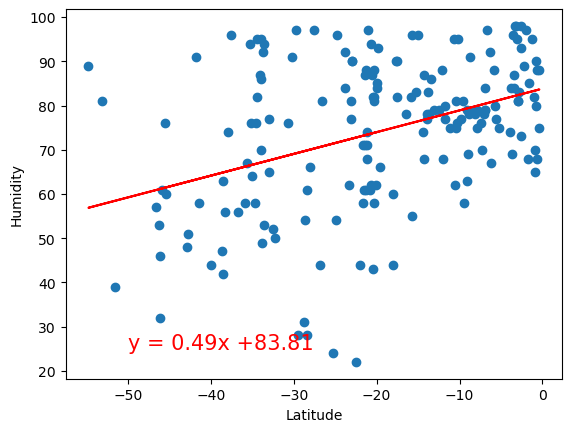

In [27]:
# Southern Hemisphere
regression_humidity_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
regression_humidity_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.annotate(regression_humidity_southern_hemi, (-50, 25), fontsize=15, color="red")
plt.show()

Discuss about the linear relationship:

Northern Hemisphere: The cities' latitudes and humdities are slightly, positively correlated for the northern hemisphere.

Southern Hemisphere: The cities's latitudes and humidities are barely, positively correlated for the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is : 0.053491559538435623


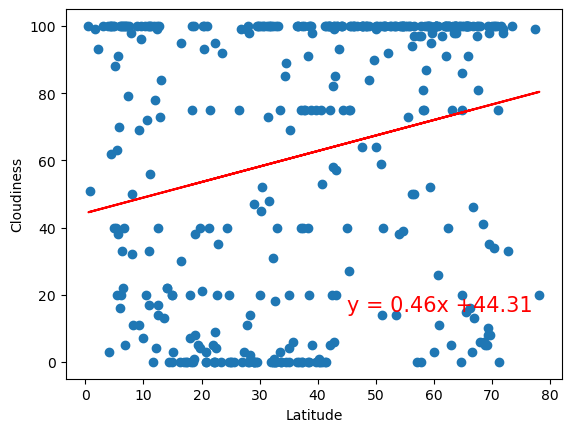

In [28]:
# Northern Hemisphere
regression_cloud_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
regression_cloud_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(regression_cloud_northern_hemi, (45, 15), fontsize=15, color="red")
plt.show()

The r-value is : 0.08545931965210923


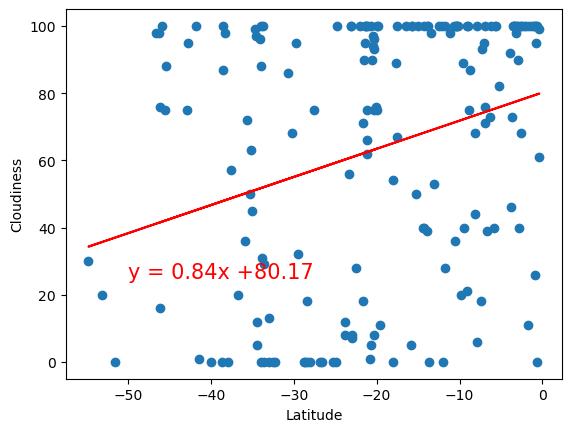

In [29]:
# Southern Hemisphere
regression_cloud_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
regression_cloud_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.annotate(regression_cloud_southern_hemi, (-50, 25), fontsize=15, color="red")
plt.show()

Discussion about the linear relationship: 

Northern Hemisphere: The cities' latitudes and cloudiness are barely, positively correlated for the northern hemisphere.

Southern Hemisphere: The cities's latitudes and cloudiness are slightly, positively correlated for the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is : 0.00502001585233432


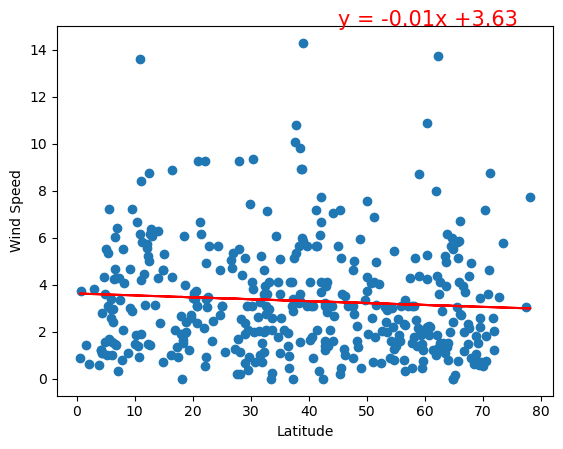

In [31]:
# Northern Hemisphere
regression_wind_northern_hemi = linear_regression_plots(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
regression_wind_northern_hemi

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(regression_wind_northern_hemi, (45, 15), fontsize=15, color="red")
plt.show()

The r-value is : 0.06151789317355455


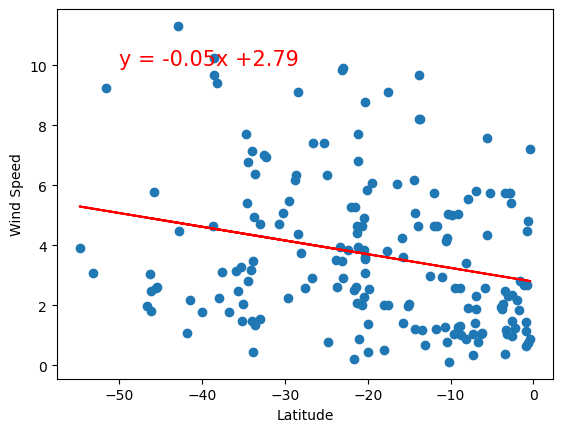

In [32]:
# Southern Hemisphere
regression_wind_southern_hemi = linear_regression_plots(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
regression_wind_southern_hemi

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.annotate(regression_wind_southern_hemi, (-50, 10), fontsize=15, color="red")
plt.show()

Discussion about the linear relationship:

Northern Hemisphere: The cities' latitudes and wind speeds are barely, positively correlated for the northern hemisphere.

Southern Hemisphere: The cities's latitudes and wind speeds are barely, negatively correlated for the southern hemisphere.